[ 1.99386977 10.        ]
6.309187032923455e-05
0.12058223025485176


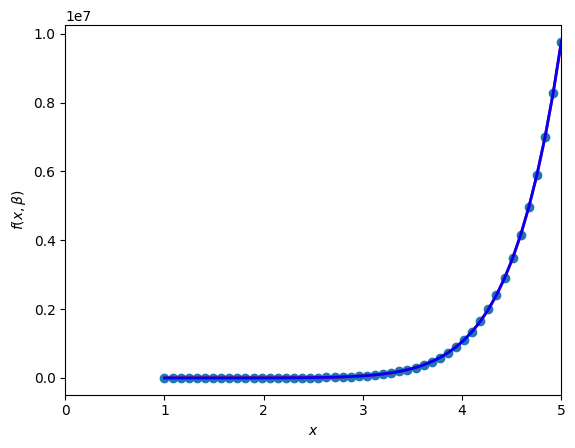

In [11]:
"""Задание 1.1.6 Р/т №4"""
import scipy as sp
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt


beta = (2, 10)
def f(x, b0, b1):
    return b0 + x ** b1

xdata = np.linspace(1, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fix, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$")
plt.show()


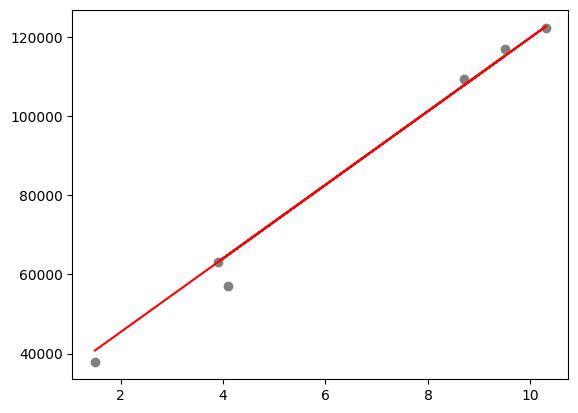

In [17]:
"""Задание 1.2.2 Р/т №4"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


dataframe = pd.read_csv("https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv", sep=',')

X_train, X_test, y_train, y_test = train_test_split(
    dataframe.iloc[:, :-1],
    dataframe.iloc[:, 1],
    test_size=0.2,
    random_state=0
)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red')
plt.show()

In [20]:
"""Задание 1.3.3 Р/т №4"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


dataframe = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv", sep=',')

X = dataframe[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']]
y = dataframe['alcohol']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

print(f'Mean Squered Error: {metrics.mean_squared_error(y_test, y_pred)}')

Mean Squered Error: 0.34708648523981483
